# Práctica n°3 : Cartas de control para variables en R

Notas del Curso Gestión de la calidad y control estadístico de procesos

** Ibeth Vergara Baquero**   
ivergara@uco.edu.co   
Universidad Católica de Oriente   
Facultad de ingenierías    
Rionegro, Colombia


> ** Objetivo de la práctica:** Desarrollar Scripts para la elaboración de cartas de control para variables y capacidad del proceso en R.

>**Contenido**
* [Diagrama Causa-Efecto](#Diagrama-Causa-Efecto)
* [Diagrama Pareto](#Diagrama-Pareto)
* [Diagramas de correlación](#Diagramas-de-correlación)
* [Histograma](#Histograma)

**Bibliografía**.
> [Package ‘qcc’](https://cran.r-project.org/web/packages/qcc/qcc.pdf)  


A continuación se presentará el taller propuesto para complementar los temas vistos en clase con la programación en R.

### Cartas de control
**1. ** Haciendo uso de los datos llamados "datospar.csv" se desea determinal si el proceso se encontraba bajo control o no al momento de realizar la toma de muestras. El archivo contiene las medidas del diametro interno de un rodamiento fabricado en una empresa muy reconocida en el medio. Las muestras se tomaron en instantes de tiempos establecidos.

***Para realizar las cartas de control se puede hacer uso de la libreria "qcc (Quality Control Charts) disponibles en R.*** 

In [4]:
## Primero debemos leer los datos y almacenarlos en una variable
a=read.csv("datospar.csv", header=T)
head(a) # para validar como se leyeron los datos (las primeras lineas)

Muestra,Replica_1,Replica_2,Replica_3,Replica_4,Replica_5
1,83.0,81.2,78.7,75.7,77.0
2,88.6,78.3,78.8,71.0,84.2
3,85.7,75.8,84.3,75.2,81.0
4,80.8,74.4,82.5,74.1,75.7
5,83.4,78.4,82.6,78.2,78.9
6,75.3,79.9,87.3,89.7,81.8


Como se puede observar el archivo contiene una columna que no representa medida alguna de los rodamientos. La columna "Muestra" contiene la numeración de las muestra, esta columna se debe retirar para evidar que se construya una carta de control con ella.

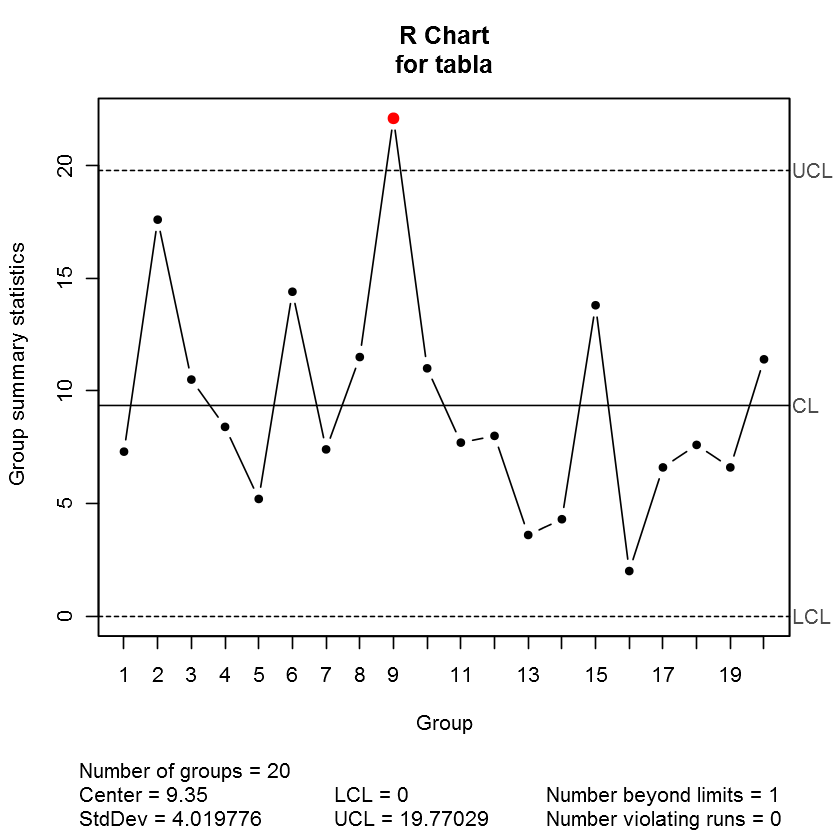

In [5]:
tabla=a[,-1] # a la variable a que contiene los datos originales, le estoy quitando la columna 1 y lo almacenamos en tabla 

# [fila,columna] el - indica retirar la columna deseada, en este caso es la columna 1

tabla=data.frame(tabla) # Creamos un data frame que es una tabla de datos que no contiene elementos faltantes es de tamaño mxm

### Recuerde que se debe iniciar siempre por la carta R

Rangos=qcc(data=tabla, type="R") # hacemos uso de la función qcc y le indicamos los datos a los que le realizaremos la carta de
                                 # Control y le indicamos que tipo de carta es.


In [6]:
# Como se puede obsvar hay un punto fuera de control que nos indica que el proceso esta fuera de control.
Rangos$violations # me indica los puntos que estan fuera de control, ya sea por estar fuera de los limites o tener corrimiento

$beyond.limits
[1] 9

$violating.runs
numeric(0)

Vamos a asumir que para la muestra 9 se identifica una causa asignable y que se puede retirar de la muestra.


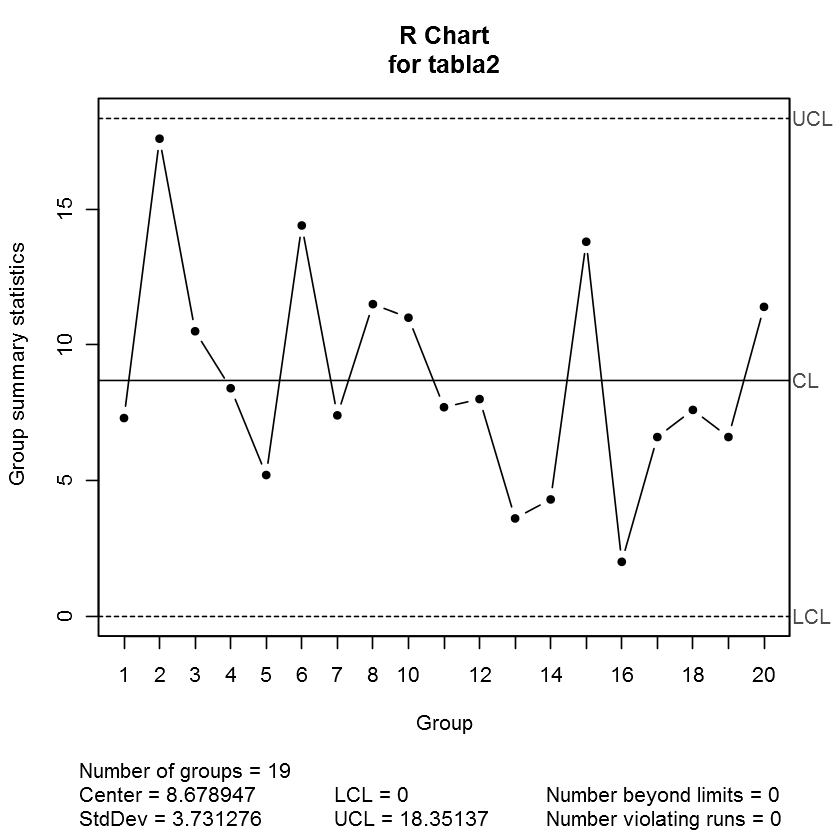

In [10]:
tabla2=tabla[-9,] # Se retira la muestra 9, recuerde que ahora es una fila la que se desea eliminar  
Rangos=qcc(data=tabla2, type="R") # volvemos a realizar la carta R


Como se puede observar la carta R muestra un control aparente del proceso, ahora podemos proceder a realizar la carta Xbar

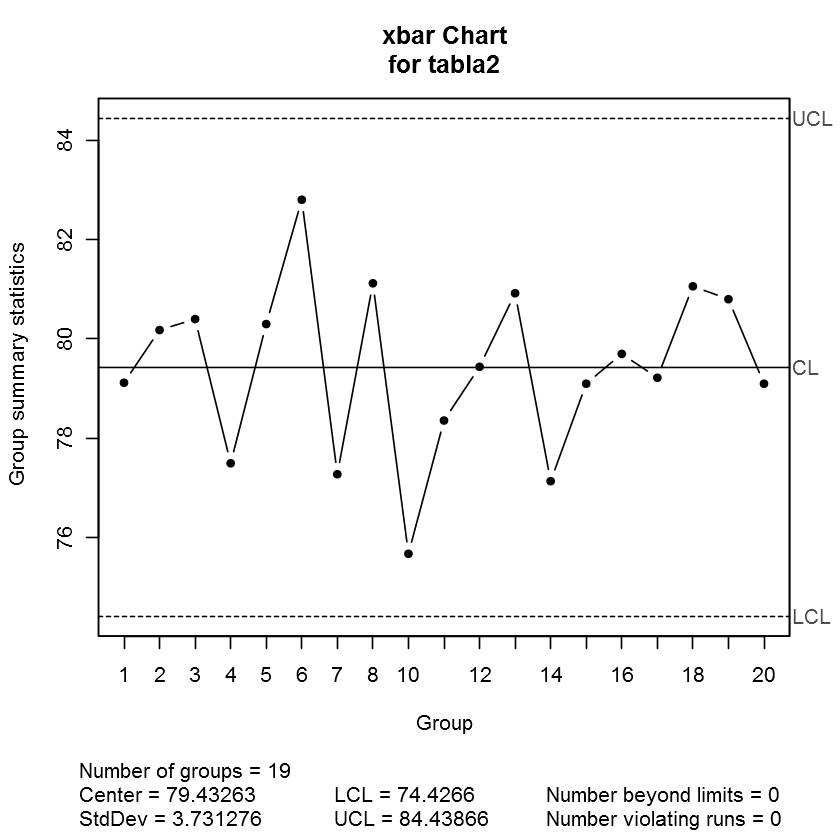

In [12]:
Medias=qcc(data=tabla2, type="xbar") 

¿Como considera que se encuentra el proceso?

## Capacidad del proceso

Por temas de diseño se tiene que el diametro interno de estos rodamientos deben cumplir como limite de especificaciones [70.5 , 85.7]

Recuerde que si su proceso no se encuentra bajo control no se debe calcular la capacidad del proceso


Process Capability Analysis

Call:
process.capability(object = Medias, spec.limits = c(70.5, 85.7))

Number of obs = 95           Target = 78.1
       Center = 79.43           LSL = 70.5
       StdDev = 3.731           USL = 85.7

Capability indices:

       Value    2.5%   97.5%
Cp    0.6789  0.5820  0.7757
Cp_l  0.7980  0.6870  0.9090
Cp_u  0.5599  0.4723  0.6475
Cp_k  0.5599  0.4555  0.6643
Cpm   0.6394  0.5436  0.7350

Exp<LSL 0.83%	 Obs<LSL 0%
Exp>USL 4.7%	 Obs>USL 4.2%


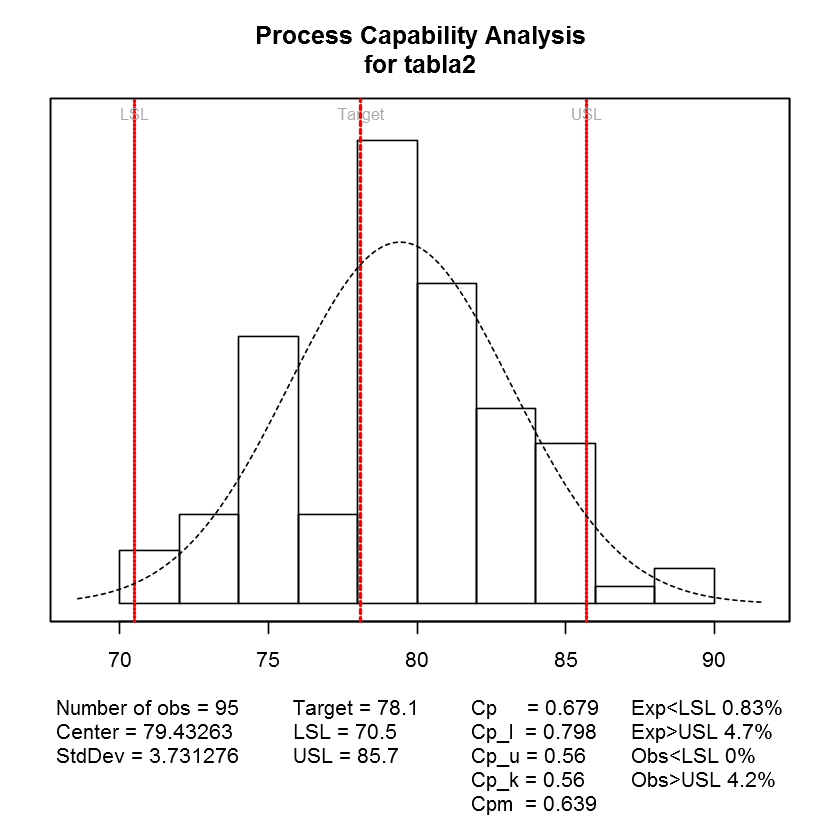

In [14]:
# Para calcular la capacidad del proceso usaremos la función process.capability los datos que este necesita 
# para determinar la capacidad es la grafica xbar e indicarle los limites de especificaciones que al ser dos valores
# uno inferior y otro superior se le debe anteponer el comando c() que indica concatenación
capacidad=process.capability(object=Medias,spec.limits=c(70.5,85.7)) 

Para que un proceso opere con una buena capacidad el proceso puede tener un cp igual o mayor que 1.33 esto me indica que no me estoy consumiendo anchos del interval de especificación.    
Tambien calcula los cp unilaterales que si su medida esta igual o superior a 1.25 tambien es indicio de una buena capacidad del proceso.    
El cp_k es la menor medida de los cp unilaterales. Si el cp_k y el cp son iguales esto indica que el proceso esta centrado en el punto medio de las especificaciones.  
Exp -- indica el porcentaje de producto defectuoso esperado
Obs -- indica el porcentaje de producto defectuoso observado